In [ ]:
# importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
# importing the dataset
df= pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# creating the 'x' variable
x = df.iloc[:,3:13].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# creating the 'y' variable
y = df.iloc[:,13]

In [ ]:
# Importing the relevant libraries from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:,2]= labelencoder.fit_transform(x[:,2])
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# Get the library from sklearn.compose and applying OneHotEncoder to column 1.
# Then we give the ColumnTransformer function a name of our choice. The functionality has been passed onto the variable ct as (Name, Functionality, Column Number)
from  sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country", OneHotEncoder(),[1])], remainder = 'passthrough')
x = ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# assigning the appropriate names to the columns
x = pd.DataFrame(x, columns = ["X1", "X2", "X3", "Credit Score", "Gender", "Age","Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"])
x

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
# dropping the extra columnn X1 to compensate for multicollinearity.
x.drop(columns="X1",inplace = True)

In [ ]:
# we split the data into train (80%) and test (20%) data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
# to normalize the data, ensuring that each feature contributes equally to the model, we use Feature Scaling.
# we standardize the data using the Standardscaler which standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
# in the above, 'fit' calculates the mean and variance of each feature in the training data, and 'transform' standardizes each feature using these statistics.
x_test = sc.transform(x_test)
# in the above, we don't use 'fit'. this uses the mean and variance computed from x_train (to avoid data leakage) and transforms x_test using the same scaling parameters, ensuring consistency between training and testing data.

In [ ]:
# we now fit a logistic regression model to the training data.
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# using above, we added a column of ones to x_train and x_test, representing the intercept term (constant).
# In regression models, an intercept term is required to meet the Gauss-Markov assumptions.

# we now initialize a logistic regression model and fit the logistic regression model to the training data.
classifier = sm.Logit(y_train, x_train)
model = classifier.fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.429005
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                  0.1520
Time:                        11:24:53   Log-Likelihood:                -3432.0
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                4.787e-257
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6472      0.034    -47.855      0.000      -1.715      -1.580
x1             0.3563      0.033     10.900      0.000       0.292       0.420
x2             0.0484      0.034      1.435      0.151      -0.018       0.115
x3            -0.0724      0.030     -2.390      0.017      -0.132      -0.013
x4            -0.2695      0.030     -8.888      0.000      -0.329      -0.210
x5             0.7526      0.030     25.037      0.000       0.694       0.811
x6            -0.0814      0.030     -2.694      0.007      -0.141      -0.022
x7             0.1537      0.036      4.283      0.000       0.083       0.224
x8            -0.0848      0.031     -2.747      0.006      -0.145      -0.024
x9            -0.0237      0.030     -0.786      0.432      -0.083       0.035
x10           -0.5189      0.032    -16.205      0.000      -0.582      -0.456
x11            0.0292      0.030      0.960      0.337      -0.030       0.089
==============================================================================
"""

**NOTE:**

x2, x9, x11 contains 0 and thus, we reject them since they are not significant.

We get a pseudo R-square 0.15 which is less than the range (0.20 , 0.45) which makes it 'not' a good fit for the model due to presence of insignificant variables.

To solve this, we drop the above variables one by one to test the model.


Accuracy: 0.812


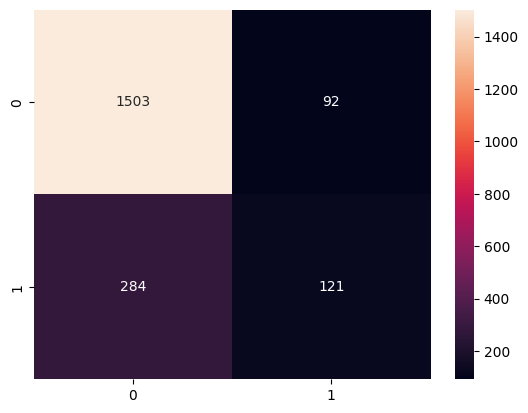

In [ ]:
# making the confusion matrix to show model performance across true and predicted classes.
# we adjust the cutoff threshold accordingly which helps customize the balance between false positives and false negatives.

import seaborn as sns
from sklearn import metrics
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.45)                                                        # setting a the cut-off value
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix                                    # making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');